In [1]:
import os, sys
import gc
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sys.path.append('../')
import torch

In [2]:
from get_algos import get_all_algos , run_experiment ,call_paths, plot_mean

In [3]:
import gym
from gym.wrappers import Monitor
from sb3_contrib import RecurrentPPO
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_atari_env

In [4]:
env_name='Breakout-v0'

### 2. Evaluation
<ol>
    <li>Create the environment</li>
    <li>For each algorithm:</li>
    <ol><li>Load the model</li>
        <li>Evaluate the model for 5 sample iterations </li>
        <li>Output the score  for each algo and each iteration</li>
        <li>Assess stability of the model based on the variance / standard deviation </li>
    </ol>
    <li>Plot the corresponding scores</li>
</ol> 

In [8]:
algo_list=['PPO','RecurrentPPO']

In [9]:
def evaluate_experiment(algo_list, env_name,n_steps=200000,n_episodes=100):
    rewards_mean={}
    rewards_std={}
    for algo_name in reversed(algo_list):
        if algo_name =='QRDQN' or 'TRPO':
            device='cpu'
        else:
            device='cuda' #GPU was unable to load the entire experience relay so moved to virtual memory on disk
        policy='CnnLstmPolicy' if algo_name=='RecurrentPPO' else 'CnnPolicy'   
        env=make_atari_env(env_name,n_envs=6)
        env=VecFrameStack(env, n_stack=6)
        print('******* Evaluating', algo_name,' *******')
        log_path, render_path, model_path=call_paths(algo_name,env_name,n_steps)
        model_name=env_name+"_"+algo_name+"_model"
        model=eval(algo_name).load(os.path.join(model_path,model_name),env,device=device)
        mean_rew, mean_std=evaluate_policy(model,env, n_eval_episodes=n_episodes)
        rewards_mean[algo_name]=mean_rew
        rewards_std[algo_name]=mean_std
        print('Mean rewards for ',n_episodes, ' episodes of ',algo_name,' is ',mean_rew,'\n')
        del model
        env.close()
    return rewards_mean,rewards_std

In [10]:
rewards=evaluate_experiment(algo_list, env_name,n_steps=5000000)

******* Evaluating RecurrentPPO  *******
Mean rewards for  100  episodes of  RecurrentPPO  is  3.46 

******* Evaluating PPO  *******
Mean rewards for  100  episodes of  PPO  is  12.41 



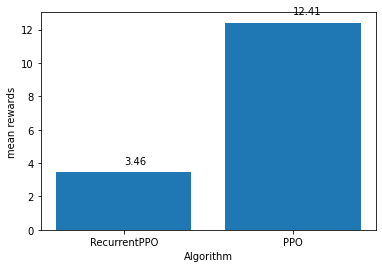

In [11]:
plot_mean(rewards[0],'mean rewards')

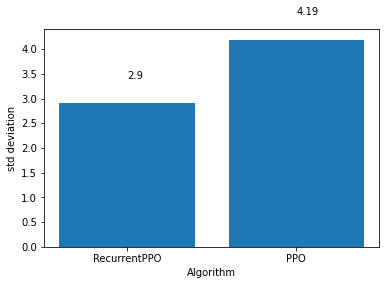

In [12]:
plot_mean(rewards[1],'std deviation')